## Import libs

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Data

In [23]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/train_advertising_data.csv"
csv_test_path = f"{notebook_path}/data/test_advertising_data.csv"

In [24]:
train_set = pd.read_csv(csv_train_path)
x_train = train_set['TV'].values
y_train = train_set['Sales'].values
x_train.shape, y_train.shape

((160,), (160,))

In [25]:
x_train = x_train[:, None]
y_train = y_train[:, None]
x_train.shape, y_train.shape

((160, 1), (160, 1))

In [26]:
test_set = pd.read_csv(csv_test_path)
x_test = test_set['TV'].values
y_test = test_set['Sales'].values
x_test.shape, y_test.shape

((40,), (40,))

In [27]:
x_test = x_test[:, None]
y_test = y_test[:, None]
x_test.shape, y_test.shape

((40, 1), (40, 1))

## Visualize

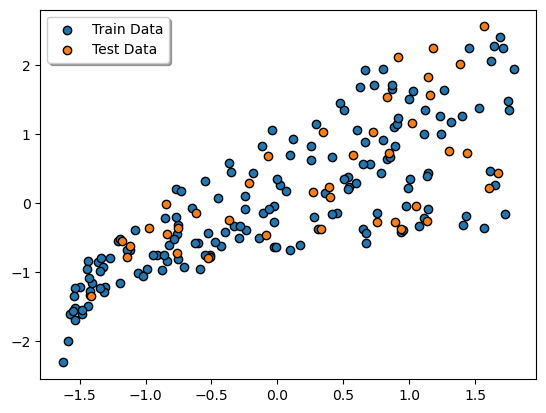

In [28]:
plt.scatter(x_train, y_train, ec='k', label='Train Data')
plt.scatter(x_test, y_test, ec='k', label='Test Data')
plt.legend(shadow=True);

## Polynomial Regression (Univariate)

### Functions

In [29]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [30]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [31]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [32]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [33]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [34]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [35]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Train

#### init

In [36]:
d = 5

w = np.random.randn(d+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 2000

(6, 1)


#### Polynomial

In [37]:
phi_x_train = polynomial(x_train)
phi_x_train.shape

(160, 6)

#### Main

In [38]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)

    # loss
    e = mse(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.6386,	 w=[ 0.34932257 -0.84481852 -0.9942924   1.37617897  0.33786582 -0.28089725]
Epoch=199, 	 E=0.5076,	 w=[ 0.3985317  -0.54261103 -0.88765179  1.45625045  0.30127377 -0.36360192]
Epoch=299, 	 E=0.4785,	 w=[ 0.37754714 -0.39319715 -0.8232088   1.44729916  0.28504285 -0.38547295]
Epoch=399, 	 E=0.4652,	 w=[ 0.35128713 -0.30516297 -0.77203954  1.40512296  0.2703625  -0.38318187]
Epoch=499, 	 E=0.4555,	 w=[ 0.32958823 -0.24356645 -0.72665148  1.35044019  0.25495501 -0.37103219]
Epoch=599, 	 E=0.447,	 w=[ 0.31206557 -0.19411178 -0.68493288  1.29152316  0.23929095 -0.35494712]
Epoch=699, 	 E=0.4393,	 w=[ 0.29732124 -0.1506714  -0.64615827  1.23183583  0.22392417 -0.33747256]
Epoch=799, 	 E=0.4322,	 w=[ 0.28439081 -0.11053843 -0.6099798   1.17286105  0.20916238 -0.31972277]
Epoch=899, 	 E=0.4256,	 w=[ 0.27272907 -0.07249161 -0.57616543  1.11523003  0.19513362 -0.30218576]
Epoch=999, 	 E=0.4195,	 w=[ 0.26203832 -0.03596888 -0.54452763  1.05919837  0.18186945 -0.28507063]
Ep

#### Learning curve

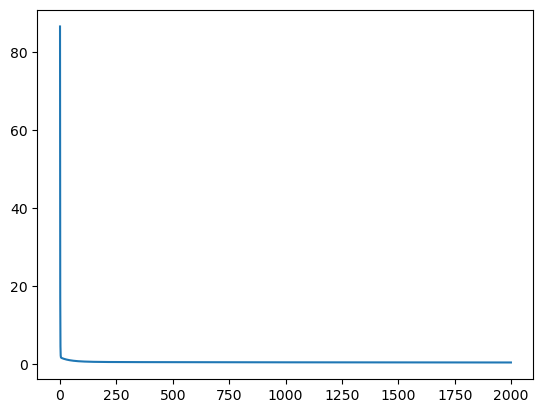

In [39]:
plt.plot(error_hist);

##### Save Model

In [40]:
np.save(f'{notebook_path}/p01_polynomial-univariate-degree-{d}', w)

### Test

##### Polynomial

In [41]:
d_list=[1,2,3,4,5]
# for d in [1, 2, 3, 5]:
for d in d_list:
  model_path=f'{notebook_path}/p01_polynomial-univariate-degree-{d}.npy'
  if not os.path.exists(model_path):
    print(f"Model not exists: {model_path}")
    continue
  w = np.load(model_path)
  phi_x_test = polynomial(x_test)
  print(f'Shape of Test Data After Poly with degree {d} is: {phi_x_test.shape}')
  y_hat_test = linear_regression(phi_x_test, w)
  print(f'R2-Score for Poly with degree {d} is: {r2(y_test, y_hat_test)}')
  print('-'*50)

Shape of Test Data After Poly with degree 1 is: (40, 2)
R2-Score for Poly with degree 1 is: 0.46138746336817504
--------------------------------------------------
Shape of Test Data After Poly with degree 2 is: (40, 3)
R2-Score for Poly with degree 2 is: 0.464135756493685
--------------------------------------------------
Shape of Test Data After Poly with degree 3 is: (40, 4)
R2-Score for Poly with degree 3 is: 0.4645463997947875
--------------------------------------------------
Shape of Test Data After Poly with degree 4 is: (40, 5)
R2-Score for Poly with degree 4 is: 0.48079726053194805
--------------------------------------------------
Shape of Test Data After Poly with degree 5 is: (40, 6)
R2-Score for Poly with degree 5 is: 0.4566485839170481
--------------------------------------------------


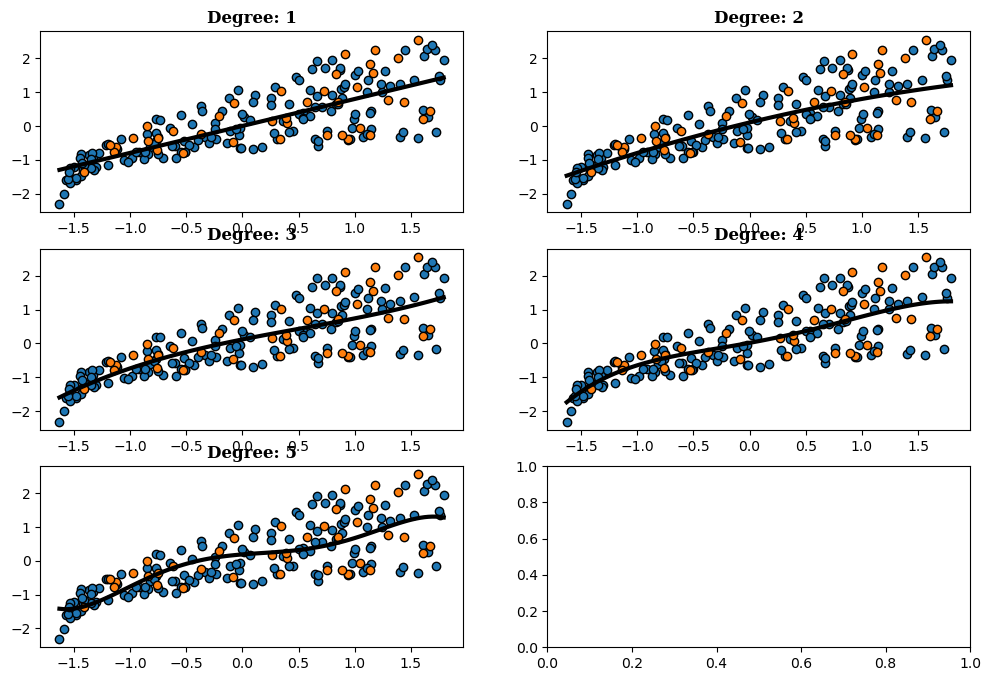

In [42]:
fix_no_y=int(len(d_list)/2)+len(d_list)%2
fig, axe = plt.subplots(fix_no_y, 2, figsize=(12, 8))
flat_ax = axe.flatten()

x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]

# for i,d in enumerate([1, 2, 3, 5]):
for i,d in enumerate(d_list):
  model_path=f'{notebook_path}/p01_polynomial-univariate-degree-{d}.npy'
  if not os.path.exists(model_path):
    print(f"Model not exists: {model_path}")
    continue
  
  w = np.load(model_path)
  xp = polynomial(x)
  y_hat = linear_regression(xp, w)

  flat_ax[i].scatter(x_train, y_train, ec='k')
  flat_ax[i].scatter(x_test, y_test, ec='k')
  flat_ax[i].plot(x, y_hat, 'k', linewidth=3)
  flat_ax[i].set_title(f'Degree: {d}', fontfamily='Serif', fontweight='bold')